# Classifiers

In this tutorial, we will talk about two very popular classifiers that are used in Machine Learning. Namely

- Bayes classifier
- Support Vector classifier

In [3]:
import pandas as pd
import sklearn.metrics
import numpy as np
# For preprocessing the data
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

## Bayes Rule

Bayes Rule:
`P(A|B) = P(B|A) * P(A) / P(B)`

where can be calculated as `P(B) =  P(B|A) * P(A) + P(B|not A) * P(not A)`

In other words:

- `P(A|B)`: Posterior probability
- `P(A)`: Prior probability
- `P(B|A)`: Likelihood
- `P(B)`: Evidence

Bayes Rule restated:

`Posterior = Likelihood * Prior  / Evidence`

For example:

`P(Fire|Smoke) = P(Smoke|Fire) * P(Fire) / P(Smoke)`

where

`P(Smoke)=P(Smoke|Fire)P(Fire) + P(Smoke|No Fire)P(No Fire)`

Another example:

If a randomly selected patient has the test and it comes back positive, what is the probability that the patient has cancer?

Test Sensitivity: `P(Test=Positive|Cancer=True) = 0.85`

Test Specificity: `P(Test=Negative | Cancer=False) = 0.95`

Prior Distribution: `P(Cancer=True) = 0.0002` and `P(Cancer=False) = 0.9998`

What is `P(Cancer=True|Test=Positive)`?


In [6]:
# calculate the probability of cancer patient and diagnostic test

# calculate P(A|B) given P(A), P(B|A), P(B|not A)
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
	# calculate P(not A)
	not_a = 1 - p_a
	# calculate P(B)
	p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
	# calculate P(A|B)
	p_a_given_b = (p_b_given_a * p_a) / p_b
	return p_a_given_b

# P(A)
p_a = 0.0002
# P(B|A)
p_b_given_a = 0.85
# P(B|not A)
p_b_given_not_a = 0.05
# calculate P(A|B)
result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 0.339%


## Bayes Classifier

Classification is a predictive modeling problem that involves assigning a label to a given input data sample.

The problem of classification predictive modeling can be framed as calculating the conditional probability of a class label given a data sample, for example:

```P(class|data) = (P(data|class) * P(class)) / P(data)```

Naive assumption (conditional independence of features):

```P(class | X1, X2, …, Xn) = P(X1|class) * P(X2|class) * … * P(Xn|class) * P(class) / P(data)```

**Bayes Classifier**: Probabilistic model that makes the most probable prediction for new examples.

## Loading Students Performance Data

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

In [47]:
student_df = pd.read_csv('data/student-por.csv', skiprows=0, header=0, encoding='utf-8', sep=';', decimal=',' )
student_df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Attributes of datasets:
```
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2 sex - student's sex (binary: 'F' - female or 'M' - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)
```

In [52]:
passScore = 10;

le = preprocessing.LabelEncoder()
sex_cat = le.fit_transform(student_df.sex)
address_cat = le.fit_transform(student_df.address)
guardian_cat   = le.fit_transform(student_df.guardian)
isPass_cat = le.fit_transform(student_df['G3']>passScore)

In [53]:
guardian_cat

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0,

In [50]:
student_df_rev = student_df

In [54]:
student_df_rev['sex_cat'] = sex_cat
student_df_rev['address_cat'] = address_cat
student_df_rev['guardian_cat'] = guardian_cat
student_df_rev['isPass'] = isPass_cat
student_df_rev

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,sex_cat,address_cat,guardian_cat,isPass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,4,0,11,11,0,1,1,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,2,9,11,11,0,1,0,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,6,12,13,12,0,1,1,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,0,14,14,14,0,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,0,11,13,13,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,2,5,4,10,11,10,0,0,1,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,1,1,4,15,15,16,0,1,1,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,5,6,11,12,9,0,1,1,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,2,6,10,10,10,1,1,1,0


In [55]:
dummy_fields = ['sex','address','guardian']
student_df_rev = student_df_rev.drop(dummy_fields, axis = 1)

In [56]:
student_df_rev = student_df_rev.reindex(['sex_cat','age','Medu','Fedu','studytime','failures','famrel','freetime','health','absences','address_cat','guardian_cat','isPass'], axis='columns')


In [57]:
student_df_rev

,sex_cat,age,Medu,Fedu,studytime,failures,famrel,freetime,health,absences,address_cat,guardian_cat,isPass
0,0,18,4,4,2,0,4,3,3,4,1,1,1
1,0,17,1,1,2,0,5,3,3,2,1,0,1
2,0,15,1,1,2,0,4,3,3,6,1,1,1
3,0,15,4,2,3,0,3,2,5,0,1,1,1
4,0,16,3,3,2,0,4,3,5,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,19,2,3,3,1,5,4,5,4,0,1,0
645,0,18,3,1,2,0,4,3,1,4,1,1,1
646,0,18,1,1,2,0,1,1,5,6,1,1,0
647,1,17,3,1,1,0,2,4,2,6,1,1,0


In [58]:
features = student_df_rev.values[:, :12]
target = student_df_rev.values[:, 12]
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=10)

## Gaussian Naive Bayes Classifier

One way we can do this is to assume that features are drawn from a distribution, such as a bell curve or Gaussian distribution. A Gaussian distribution can be summarized using only two numbers: the mean and the standard deviation. 

`f(x) = (1 / sqrt(2 * PI) * sigma) * exp(-((x-mean)^2 / (2 * sigma^2)))`

Where `sigma` is the standard deviation for x, `mean` is the mean for `x` and `PI` is the value of pi.

In [59]:
clf = GaussianNB()
clf.fit(features_train, target_train)

GaussianNB()

In [62]:
target_pred = clf.predict(features_test)
target_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

**Accuracy = (TruePositive + TrueNegative) / SampleSize**

In [65]:
acc=accuracy_score(target_test, target_pred, normalize = True)
acc

0.7692307692307693

**Classification Error = 1 - Accuracy**

In [67]:
cls_err = 1- acc
cls_err

0.23076923076923073

**Sensitivity = TruePositive / (TruePositive + FalseNegative)**

In [70]:
sens = sklearn.metrics.recall_score(target_test, target_pred, labels=None, average =  'micro', sample_weight=None)
sens

0.7692307692307693

**Specificity = TrueNegative / (TrueNegative + FalsePositive)**

In [71]:
spec = 1 - sens
spec

0.23076923076923073

# Support Vector Classifier

It is based on the idea of finding a hyperplane that best separates the features into different domains.

Consider how many ways we can draw a decision boundary between 2 classes:
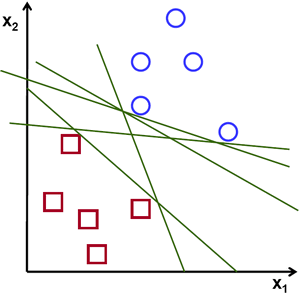

But we just need a single one, the best one. What is the best one? Which can best generalize our prediction? Such decision rule is finding the **maximum margin separator** as shown below:

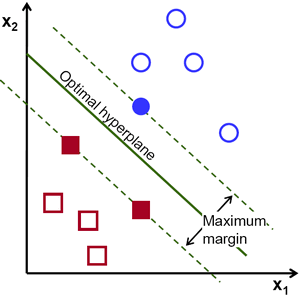

What is data items are not linearly seperable? Transform your data set to a higher dimension and find a **maximum margin separator** there. It is called a **kernel trick**.

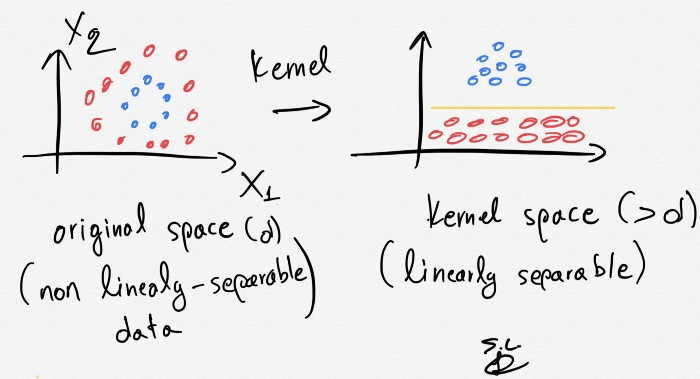

In [72]:
from sklearn import svm

In [87]:
svm_clf = svm.SVC(kernel='linear', C=10, gamma=10)
svm_clf.fit(features_train, target_train)

SVC(C=10, gamma=10, kernel='linear')

In [88]:
svm_target_pred = svm_clf.predict(features_test)
#accuracy
print("Accuracy is",accuracy_score(target_test, svm_target_pred, normalize = True))
#classification error
print("Classification error is",1- accuracy_score(target_test, svm_target_pred, normalize = True))
#sensitivity
print("sensitivity is", sklearn.metrics.recall_score(target_test, svm_target_pred, labels=None, average =  'micro', sample_weight=None))
#specificity
print("specificity is", 1 - sklearn.metrics.recall_score(target_test, svm_target_pred,labels=None, average =  'micro', sample_weight=None))

Accuracy is 0.7948717948717948
Classification error is 0.20512820512820518
sensitivity is 0.7948717948717948
specificity is 0.20512820512820518
